<a href="https://colab.research.google.com/github/sharmaarjun1228/loksabha/blob/main/finalElection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lok Sabha Election 2024 Dataset

*Webscraping Of Election Commision of India*

Author: **Arjun Sharma**


---




Github:

Linkedin:

Lok Sabha Election Dataset

*Webscraping Of Election Commision of India*


---




Overview
This Google Colab notebook script is designed to extract election result data from the Election Commission of India's website and organize it into separate sheets for each state. This script combines multiple functionalities into a cohesive workflow, facilitating the extraction, parsing, and organization of election data into a structured format.


---



Author
Name: Arjun Sharma
Affiliation: Almabetter



---


Workflow


Step 1: Extracting Initial URLs
The script starts by fetching a list of URLs from the main Election Commission website using BeautifulSoup and requests libraries. These URLs are derived from dropdown options representing different states' election results.

Step 2: Extracting Additional URLs
Next, the script iterates through the initial URLs to find and extract additional URLs from each page, aggregating them into a comprehensive list.

Step 3: Fetching and Parsing Data
For each URL in the aggregated list, the script navigates through pagination if present, extracts tabular data using BeautifulSoup, and parses it into structured rows. It handles nested tables and extracts relevant data points such as constituency names, candidate information, margins, and statuses.

Step 4: Organizing Data by State
After extracting and parsing data from all URLs, the script organizes the collected data into separate sheets within a single Excel file. Each sheet corresponds to election results from a specific state, making it easier to analyze data by state.

Step 5: Saving Output
Finally, the script saves the consolidated data into an Excel file named election_results.xlsx, with each sheet named after the respective state.

---

Usage


Environment Setup: Ensure you have Python 3.x installed along with necessary libraries (pandas, requests, beautifulsoup4).
Run the Script: Execute the script cell by cell in Google Colab or any Python environment.
Output: Review the generated election_results.xlsx file, which contains organized election data by state.
Dependencies
requests: For fetching web pages.
beautifulsoup4: For parsing HTML content.
pandas: For data manipulation and Excel file handling.
Note
This script assumes a stable internet connection and consistent website structure from the Election Commission of India's website. Any changes in website structure may require script adjustments.

In [ ]:
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm

https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm

In [3]:
!!pip install selenium beautifulsoup4 pandas



['Collecting selenium',
 '  Downloading selenium-4.21.0-py3-none-any.whl (9.5 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/9.5 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/9.5 MB\x1b \x1b835.1 kB/s\x1b eta \x1b0:00:12\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/9.5 MB\x1b \x1b1.2 MB/s\x1b eta \x1b0:00:08\x1b',
 '\x1b[2K     \x1b━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.3/9.5 MB\x1b \x1b2.4 MB/s\x1b eta \x1b0:00:04\x1b',
 '\x1b[2K     \x1b━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.6/9.5 MB\x1b \x1b4.5 MB/s\x1b eta \x1b0:00:02\x1b',
 '\x1b[2K     \x1b━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b1.4/9.5 MB\x1b \x1b8.0 MB/s\x1b eta \x1b0:00:02\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b2.8/9.5 MB\x1b \x1b13.5 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[

In [22]:
from bs4 import BeautifulSoup
import pandas as pd

import requests

# Replace with the actual URL of the webpage containing the dropdown list
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Try finding by ID first (modify the ID if necessary)
dropdown = soup.find("select", id="ctl00_ContentPlaceHolder1_Result1_ddlState")

# Handle case where dropdown with ID is not found
if not dropdown:
  # Try finding by class name (replace with actual class name if applicable)
  dropdown = soup.find("select", class_="dropdown-class")
  if not dropdown:
    # Try finding by text content within the element (replace with actual text if applicable)
    dropdown = soup.find("select", text="Select State Wise")  # Modify this line for the dropdown's starting text
    if not dropdown:
      print("Dropdown element not found on the webpage.")
      exit()  # Exit the script if dropdown not found with any method

# Extract all options from the dropdown (assuming dropdown is found)
options = dropdown.find_all("option")

# List to store extracted URLs
urls = []

# Loop through each option
for option in options:
  # Skip the first option (usually "Select State Wise")
  if option.get("value") != "":
    # Extract the URL value from the option
    url_value = option.get("value")
    # Construct the complete URL based on the website's logic
    new_url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{url_value}.htm"  # Modify this line based on actual URL generation logic
    urls.append(new_url)

# Print the collected URLs
print("Extracted URLs:")
for url in urls:
  print(url)


Extracted URLs:
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresul

In [23]:
df=pd.DataFrame(urls)
print(df)

                                                    0
0   https://results.eci.gov.in/PcResultGenJune2024...
1   https://results.eci.gov.in/PcResultGenJune2024...
2   https://results.eci.gov.in/PcResultGenJune2024...
3   https://results.eci.gov.in/PcResultGenJune2024...
4   https://results.eci.gov.in/PcResultGenJune2024...
5   https://results.eci.gov.in/PcResultGenJune2024...
6   https://results.eci.gov.in/PcResultGenJune2024...
7   https://results.eci.gov.in/PcResultGenJune2024...
8   https://results.eci.gov.in/PcResultGenJune2024...
9   https://results.eci.gov.in/PcResultGenJune2024...
10  https://results.eci.gov.in/PcResultGenJune2024...
11  https://results.eci.gov.in/PcResultGenJune2024...
12  https://results.eci.gov.in/PcResultGenJune2024...
13  https://results.eci.gov.in/PcResultGenJune2024...
14  https://results.eci.gov.in/PcResultGenJune2024...
15  https://results.eci.gov.in/PcResultGenJune2024...
16  https://results.eci.gov.in/PcResultGenJune2024...
17  https://results.eci.gov.

In [70]:
print(urls)

['https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm', 'https://results.eci.gov.in/PcResultG

In [71]:
ls=pd.read_csv("/content/s2selection_results_combined.csv")
print(ls)


                  Constituency  Const. No.                 Leading Candidate  \
0    Andaman & Nicobar Islands           1                   BISHNU PADA RAY   
1              Amalapuram (SC)           7             G M HARISH (BALAYOGI)   
2                   Anakapalle           5                        C.M.RAMESH   
3                   Ananthapur          19  AMBICA G LAKSHMINARAYANA VALMIKI   
4                   Araku (ST)           1                GUMMA THANUJA RANI   
..                         ...         ...                               ...   
355                 Coochbehar           1    JAGADISH CHANDRA BARMA BASUNIA   
356                 Darjeeling           4                        RAJU BISTA   
357            Diamond harbour          21                 ABHISHEK BANERJEE   
358                    Dum dum          16                       SOUGATA RAY   
359                     Ghatal          32             ADHIKARI DEEPAK (DEV)   

                                       

In [72]:
from IPython.display import display
display(ls)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,State
0,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party i Party Wise State Tren...,KULDEEP RAI SHARMA,Indian National Congress i Party Wise State Tr...,24396,Result Declared,Andaman & Nicobar Islands
1,Amalapuram (SC),7,G M HARISH (BALAYOGI),Telugu Desam i Party Wise State Trends Leading...,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party i Party ...,342196,Result Declared,Andhra Pradesh
2,Anakapalle,5,C.M.RAMESH,Bharatiya Janata Party i Party Wise State Tren...,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party i Party ...,296530,Result Declared,Andhra Pradesh
3,Ananthapur,19,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam i Party Wise State Trends Leading...,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party i Party ...,188555,Result Declared,Andhra Pradesh
4,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party i Party ...,KOTHAPALLI GEETHA,Bharatiya Janata Party i Party Wise State Tren...,50580,Result Declared,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...
355,Coochbehar,1,JAGADISH CHANDRA BARMA BASUNIA,All India Trinamool Congress i Party Wise Stat...,NISITH PRAMANIK,Bharatiya Janata Party i Party Wise State Tren...,39250,Result Declared,West Bengal
356,Darjeeling,4,RAJU BISTA,Bharatiya Janata Party i Party Wise State Tren...,GOPAL LAMA,All India Trinamool Congress i Party Wise Stat...,178525,Result Declared,West Bengal
357,Diamond harbour,21,ABHISHEK BANERJEE,All India Trinamool Congress i Party Wise Stat...,ABHIJIT DAS (BOBBY),Bharatiya Janata Party i Party Wise State Tren...,710930,Result Declared,West Bengal
358,Dum dum,16,SOUGATA RAY,All India Trinamool Congress i Party Wise Stat...,SILBHADRA DATTA,Bharatiya Janata Party i Party Wise State Tren...,70660,Result Declared,West Bengal


from matplotlib import pyplot as plt
ls['Const. No.'].plot(kind='hist', bins=20, title='Const. No.')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ls['Margin'].plot(kind='hist', bins=20, title='Margin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ls.plot(kind='scatter', x='Const. No.', y='Margin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Leading Candidate']
  ys = series['Const. No.']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ls.sort_values('Leading Candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Leading Candidate')
_ = plt.ylabel('Const. No.')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Leading Candidate']
  ys = series['Margin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ls.sort_values('Leading Candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Leading Candidate')
_ = plt.ylabel('Margin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Leading Candidate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Leading Candidate'}, axis=1)
              .sort_values('Leading Candidate', ascending=True))
  xs = counted['Leading Candidate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ls.sort_values('Leading Candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Leading Candidate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Trailing Candidate']
  ys = series['Const. No.']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ls.sort_values('Trailing Candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Trailing Candidate')
_ = plt.ylabel('Const. No.')

from matplotlib import pyplot as plt
ls['Const. No.'].plot(kind='line', figsize=(8, 4), title='Const. No.')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ls['Margin'].plot(kind='line', figsize=(8, 4), title='Margin')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Constituency'>

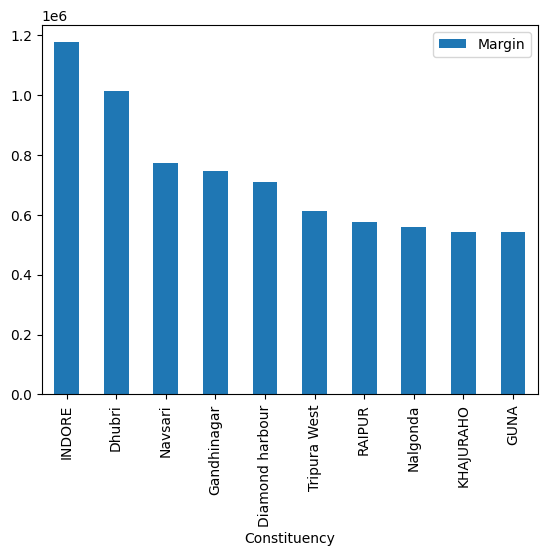

In [77]:
# @title Margin of victory by constituency

ls.sort_values(by='Margin', ascending=False).head(10).plot.bar(x='Constituency', y='Margin')

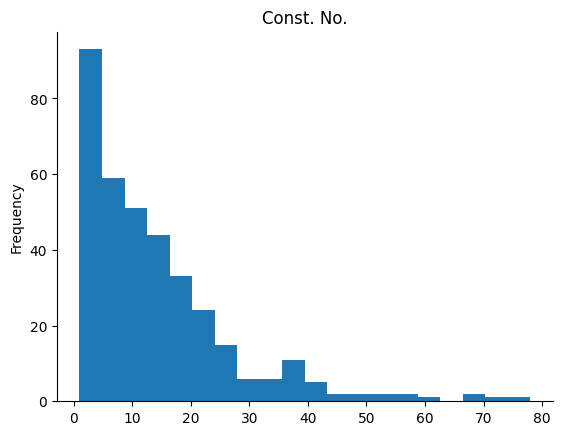

In [76]:
from matplotlib import pyplot as plt
ls['Const. No.'].plot(kind='hist', bins=20, title='Const. No.')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Code to extract url from main website i.e from Dropdown Menu **

code save in murls

In [42]:
from bs4 import BeautifulSoup
import pandas as pd

import requests

# Replace with the actual URL of the webpage containing the dropdown list
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Try finding by ID first (modify the ID if necessary)
dropdown = soup.find("select", id="ctl00_ContentPlaceHolder1_Result1_ddlState")

# Handle case where dropdown with ID is not found
if not dropdown:
  # Try finding by class name (replace with actual class name if applicable)
  dropdown = soup.find("select", class_="dropdown-class")
  if not dropdown:
    # Try finding by text content within the element (replace with actual text if applicable)
    dropdown = soup.find("select", text="Select State Wise")  # Modify this line for the dropdown's starting text
    if not dropdown:
      print("Dropdown element not found on the webpage.")
      exit()  # Exit the script if dropdown not found with any method

# Extract all options from the dropdown (assuming dropdown is found)
options = dropdown.find_all("option")

# List to store extracted URLs
murls = []

# Loop through each option
for option in options:
  # Skip the first option (usually "Select State Wise")
  if option.get("value") != "":
    # Extract the URL value from the option
    url_value = option.get("value")
    # Construct the complete URL based on the website's logic
    new_url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{url_value}.htm"  # Modify this line based on actual URL generation logic
    murls.append(new_url)

# Print the collected URLs
print("Extracted URLs:")
for url in murls:
  print(url)




Extracted URLs:
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresul

In [43]:
print(murls)

['https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm', 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm', 'https://results.eci.gov.in/PcResultG

In [47]:
import requests
from bs4 import BeautifulSoup

# Replace with the actual list of URLs fetched from the main website
nurls = murls

# List to store new URLs
new_urls = []

# Iterate through each URL
for url in nurls:
    # Send a request to the webpage and parse the HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all <a> tags that contain the new URLs
    links = soup.find_all("a", class_="btn btn-primary", href=True)

    # Extract the href attribute from each <a> tag and append to new_urls list
    for link in links:
        new_url = link["href"]
        if new_url.startswith("http"):  # Ensure it's a valid URL
            new_full_url = url[:url.rfind('/')+1] + new_url
            new_urls.append(new_full_url)

# Print the collected new URLs
print("New URLs collected:")
for new_url in new_urls:
    print(new_url)


New URLs collected:


# **All constituency at Glance Url**

*example from one website url *

In [48]:
from bs4 import BeautifulSoup
import requests

# Example URL with the HTML structure you provided
url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm"

# Send a request to the webpage and parse the HTML
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find all <a> tags that contain the new URLs
links = soup.find_all("a", class_="btn btn-primary", href=True)

# List to store new full URLs
new_urls = []

# Extract and construct full URLs
for link in links:
    href = link["href"]
    if href.startswith("http"):  # Full URL already
        new_url = href
    else:  # Relative URL, construct full URL
        new_url = url[:url.rfind('/') + 1] + href
    new_urls.append(new_url)

# Print the collected new URLs
print("New URLs collected:")
for new_url in new_urls:
    print(new_url)


New URLs collected:
https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm


# **Fetching Url from Main website to all new Url i.e secondary urls **

In [68]:
import requests
from bs4 import BeautifulSoup

# Replace with your actual list of URLs from the main website
urls = murls

# List to store all extracted new URLs
all_new_urls = []

# Iterate through each URL
for url in urls:
    # Send a request to the webpage and parse the HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all <a> tags that contain the new URLs
    links = soup.find_all("a", class_="btn btn-primary", href=True)

    # List to store new full URLs for the current URL
    new_urls = []

    # Extract and construct full URLs
    for link in links:
        href = link["href"]
        if href.startswith("http"):  # Full URL already
            new_url = href
        else:  # Relative URL, construct full URL
            new_url = url[:url.rfind('/') + 1] + href
        new_urls.append(new_url)

    # Add the new URLs to the list of all extracted URLs
    all_new_urls.extend(new_urls)

# Print the collected new URLs
print("All New URLs collected:")
for new_url in all_new_urls:
    print(new_url)


All New URLs collected:
https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS011.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS021.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS031.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS041.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseU021.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS261.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseU031.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS051.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS061.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS071.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS081.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseU081.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS271.htm
https://results.eci.gov.in/PcResultGenJune2024/statewiseS101.htm
h

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Replace with your actual list of URLs from all_new_urls
fall_new_urls = all_new_urls

# List to store all extracted data
all_data = []

# Iterate through each URL
for url in fall_new_urls:
    # Send a request to the webpage and parse the HTML
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table within the HTML structure
    table = soup.find("table", class_="table table-striped table-bordered")
    if table:
        # Extract table rows
        rows = table.find_all("tr")

        # Extract data from each row, skipping non-data rows
        for row in rows:
            # Initialize empty row data
            row_data = []
            # Extract columns (td elements) from each row
            columns = row.find_all("td")
            if len(columns) == 8:  # Ensure the row has exactly 8 columns
                for column in columns:
                    # Append cleaned text to row data
                    row_data.append(column.get_text(strip=True))
                # Append row data to all_data list
                all_data.append(row_data)

# Define column headers for the CSV file (adjust as needed)
headers = [
    "Constituency",
    "Const. No.",
    "Leading Candidate",
    "Leading Party",
    "Trailing Candidate",
    "Trailing Party",
    "Margin",
    "Status"
]

# Create a DataFrame using Pandas
df = pd.DataFrame(all_data, columns=headers)

# Define the path where you want to save the CSV file
csv_filename = "election_results.csv"

# Save DataFrame to CSV
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' saved successfully.")


CSV file 'election_results.csv' saved successfully.


In [56]:
ks=pd.read_csv("election_results.csv")
print(ks)


Empty DataFrame
Columns: [Constituency, Const. No., Leading Candidate, Leading Party, Trailing Candidate, Trailing Party, Margin, Status]
Index: []


# **Example to fetch data from single url like Andaman Nikobar**

In [58]:
# Example to fetch data from single url like Andaman Nikobar

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL to fetch the table data from
url = "https://results.eci.gov.in/PcResultGenJune2024/statewiseU011.htm"

# Send a request to the webpage and parse the HTML
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table within the HTML structure
table = soup.find("table", class_="table table-striped table-bordered")

if table is None:
    raise ValueError("Table not found on the webpage")

# Initialize a list to store the data
table_data = []

# Extract the table headers
headers = []
header_row = table.find_all("tr")[1]  # Assuming the second <tr> contains the headers

if header_row:
    for header in header_row.find_all("th"):
        headers.append(header.get_text(strip=True))

# Extract the table rows
rows = table.find("tbody").find_all("tr", recursive=False)

for row in rows:
    columns = row.find_all("td", recursive=False)
    row_data = []
    for column in columns:
        # If the column contains nested tables, extract the relevant text
        nested_table = column.find("table")
        if nested_table:
            nested_text = " ".join(nested_table.stripped_strings)
            row_data.append(nested_text)
        else:
            row_data.append(column.get_text(strip=True))
    table_data.append(row_data)

# Create a DataFrame using Pandas
df = pd.DataFrame(table_data, columns=headers)

# Define the path where you want to save the CSV file
csv_filename = "election_results1.csv"

# Save DataFrame to CSV
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' saved successfully.")


CSV file 'election_results1.csv' saved successfully.


In [59]:
ik=pd.read_csv("election_results1.csv")
print(ik)

                Constituency  Const. No. Leading Candidate  \
0  Andaman & Nicobar Islands           1   BISHNU PADA RAY   

                                       Leading Party  Trailing Candidate  \
0  Bharatiya Janata Party i Party Wise State Tren...  KULDEEP RAI SHARMA   

                                      Trailing Party  Margin           Status  
0  Indian National Congress i Party Wise State Tr...   24396  Result Declared  


In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of URLs to extract the table data from
fall_new_urls = all_new_urls

# Initialize a list to store all table data
all_table_data = []

# Define headers based on the provided table structure
headers = [
    "Constituency", "Const. No.", "Leading Candidate", "Leading Party",
    "Trailing Candidate", "Trailing Party", "Margin", "Status"
]

# Function to extract table data from a given URL
def extract_table_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    table = soup.find("table", class_="table table-striped table-bordered")

    if table is None:
        print(f"Table not found on {url}")
        return []

    rows = table.find("tbody").find_all("tr", recursive=False)
    table_data = []

    for row in rows:
        columns = row.find_all("td", recursive=False)
        row_data = []
        for column in columns:
            # If the column contains nested tables, extract the relevant text
            nested_table = column.find("table")
            if nested_table:
                nested_text = " ".join(nested_table.stripped_strings)
                row_data.append(nested_text)
            else:
                row_data.append(column.get_text(strip=True))
        table_data.append(row_data)

    return table_data

# Iterate through each URL and extract the table data
for url in fall_new_urls:
    data = extract_table_data(url)
    all_table_data.extend(data)

# Create a DataFrame using Pandas
df = pd.DataFrame(all_table_data, columns=headers)

# Define the path where you want to save the CSV file
csv_filename = "election_results_combined.csv"

# Save DataFrame to CSV
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' saved successfully.")


CSV file 'election_results_combined.csv' saved successfully.


### All fetch data in single sheet

In [75]:
# All fetch data in single sheet

import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of initial URLs to extract the table data from
fall_new_urls = all_new_urls

# Initialize a list to store all table data
all_table_data = []

# Define headers based on the provided table structure
headers = [
    "Constituency", "Const. No.", "Leading Candidate", "Leading Party",
    "Trailing Candidate", "Trailing Party", "Margin", "Status", "State"
]

# Function to extract table data from a given URL
def extract_table_data(url):
    state_data = []

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        table = soup.find("table", class_="table table-striped table-bordered")
        state = soup.find("h2").get_text(strip=True)

        if table is None:
            print(f"Table not found on {url}")
            break

        rows = table.find("tbody").find_all("tr", recursive=False)
        for row in rows:
            columns = row.find_all("td", recursive=False)
            row_data = []
            for column in columns:
                # If the column contains nested tables, extract the relevant text
                nested_table = column.find("table")
                if nested_table:
                    nested_text = " ".join(nested_table.stripped_strings)
                    row_data.append(nested_text)
                else:
                    row_data.append(column.get_text(strip=True))
            row_data.append(state)
            state_data.append(row_data)

        # Find the next page link, if it exists
        next_page = soup.find("ul", class_="pagination")
        if next_page:
            current_page = next_page.find("li", class_="active")
            if current_page:
                next_page_link = current_page.find_next_sibling("li")
                if next_page_link:
                    next_page_url = next_page_link.find("a")["href"]
                    if not next_page_url.startswith("http"):
                        next_page_url = "/".join(url.split("/")[:-1]) + "/" + next_page_url
                    url = next_page_url
                else:
                    url = None
            else:
                url = None
        else:
            url = None

    return state_data

# Iterate through each initial URL and extract the table data
for url in fall_new_urls:
    data = extract_table_data(url)
    all_table_data.extend(data)

# Create a DataFrame using Pandas
df = pd.DataFrame(all_table_data, columns=headers)

# Define the path where you want to save the CSV file
csv_filename = "lllelection_results_combined.csv"

# Save DataFrame to CSV
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' saved successfully.")


CSV file 'lllelection_results_combined.csv' saved successfully.


# **All state in diffrent sheet in one workbook**

In [66]:
# state wise excel sheet code

import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of initial URLs to extract the table data from
fall_new_urls = all_new_urls

# Initialize a dictionary to store table data by state
state_data_dict = {}

# Define headers based on the provided table structure
headers = [
    "Constituency", "Const. No.", "Leading Candidate", "Leading Party",
    "Trailing Candidate", "Trailing Party", "Margin", "Status", "State"
]

# Function to extract table data from a given URL
def extract_table_data(url):
    state_data = []
    state_name = ""

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        table = soup.find("table", class_="table table-striped table-bordered")
        state = soup.find("h2").get_text(strip=True)
        if not state_name:
            state_name = state

        if table is None:
            print(f"Table not found on {url}")
            break

        rows = table.find("tbody").find_all("tr", recursive=False)
        for row in rows:
            columns = row.find_all("td", recursive=False)
            row_data = []
            for column in columns:
                # If the column contains nested tables, extract the relevant text
                nested_table = column.find("table")
                if nested_table:
                    nested_text = " ".join(nested_table.stripped_strings)
                    row_data.append(nested_text)
                else:
                    row_data.append(column.get_text(strip=True))
            row_data.append(state)
            state_data.append(row_data)

        # Find the next page link, if it exists
        next_page = soup.find("ul", class_="pagination")
        if next_page:
            current_page = next_page.find("li", class_="active")
            if current_page:
                next_page_link = current_page.find_next_sibling("li")
                if next_page_link:
                    next_page_url = next_page_link.find("a")["href"]
                    if not next_page_url.startswith("http"):
                        next_page_url = "/".join(url.split("/")[:-1]) + "/" + next_page_url
                    url = next_page_url
                else:
                    url = None
            else:
                url = None
        else:
            url = None

    return state_name, state_data

# Iterate through each initial URL and extract the table data
for url in fall_new_urls:
    state_name, data = extract_table_data(url)
    if state_name in state_data_dict:
        state_data_dict[state_name].extend(data)
    else:
        state_data_dict[state_name] = data

# Save each state's data to a separate sheet in an Excel file
with pd.ExcelWriter("election_results_by_state.xlsx") as writer:
    for state, data in state_data_dict.items():
        df = pd.DataFrame(data, columns=headers)
        df.to_excel(writer, sheet_name=state, index=False)

print("Excel file with state-wise sheets saved successfully.")


Excel file with state-wise sheets saved successfully.


# combined code of three script , to create combine data

In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Extract URLs from the main website dropdown list
def extract_dropdown_urls():
    url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    dropdown = soup.find("select", id="ctl00_ContentPlaceHolder1_Result1_ddlState")
    if not dropdown:
        print("Dropdown element not found on the webpage.")
        return []

    options = dropdown.find_all("option")
    urls = []
    for option in options:
        if option.get("value") != "":
            url_value = option.get("value")
            new_url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{url_value}.htm"
            urls.append(new_url)

    return urls

# Step 2: Extract all new URLs from each initial URL
def extract_all_new_urls(initial_urls):
    all_new_urls = []
    for url in initial_urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        links = soup.find_all("a", class_="btn btn-primary", href=True)
        new_urls = []

        for link in links:
            href = link["href"]
            if href.startswith("http"):
                new_url = href
            else:
                new_url = url[:url.rfind('/') + 1] + href
            new_urls.append(new_url)

        all_new_urls.extend(new_urls)

    return all_new_urls

# Step 3: Extract table data from each URL
def extract_table_data(url):
    state_data = []

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        table = soup.find("table", class_="table table-striped table-bordered")
        state = soup.find("h2").get_text(strip=True)

        if table is None:
            print(f"Table not found on {url}")
            break

        rows = table.find("tbody").find_all("tr", recursive=False)
        for row in rows:
            columns = row.find_all("td", recursive=False)
            row_data = []
            for column in columns:
                nested_table = column.find("table")
                if nested_table:
                    nested_text = " ".join(nested_table.stripped_strings)
                    row_data.append(nested_text)
                else:
                    row_data.append(column.get_text(strip=True))
            row_data.append(state)
            state_data.append(row_data)

        next_page = soup.find("ul", class_="pagination")
        if next_page:
            current_page = next_page.find("li", class_="active")
            if current_page:
                next_page_link = current_page.find_next_sibling("li")
                if next_page_link:
                    next_page_url = next_page_link.find("a")["href"]
                    if not next_page_url.startswith("http"):
                        next_page_url = "/".join(url.split("/")[:-1]) + "/" + next_page_url
                    url = next_page_url
                else:
                    url = None
            else:
                url = None
        else:
            url = None

    return state_data

# Step 4: Combine all steps and generate CSV
def main():
    # Step 1: Extract URLs from the main website dropdown list
    initial_urls = extract_dropdown_urls()
    if not initial_urls:
        print("No initial URLs extracted. Exiting.")
        return

    # Step 2: Extract all new URLs from each initial URL
    all_new_urls = extract_all_new_urls(initial_urls)

    # Step 3: Extract table data from each new URL
    all_table_data = []
    for url in all_new_urls:
        data = extract_table_data(url)
        all_table_data.extend(data)

    # Step 4: Create DataFrame and save as CSV
    headers = [
        "Constituency", "Const. No.", "Leading Candidate", "Leading Party",
        "Trailing Candidate", "Trailing Party", "Margin", "Status", "State"
    ]
    df = pd.DataFrame(all_table_data, columns=headers)

    csv_filename = "ffffelection_results_combined.csv"
    df.to_csv(csv_filename, index=False)
    print(f"CSV file '{csv_filename}' saved successfully.")

if __name__ == "__main__":
    main()


CSV file 'ffffelection_results_combined.csv' saved successfully.


# one single script for different sheet

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Extract URLs from the main website dropdown list
def extract_dropdown_urls():
    url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    dropdown = soup.find("select", id="ctl00_ContentPlaceHolder1_Result1_ddlState")
    if not dropdown:
        print("Dropdown element not found on the webpage.")
        return []

    options = dropdown.find_all("option")
    urls = []
    for option in options:
        if option.get("value") != "":
            url_value = option.get("value")
            new_url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{url_value}.htm"
            urls.append(new_url)

    return urls

# Step 2: Extract all new URLs from each initial URL
def extract_all_new_urls(initial_urls):
    all_new_urls = []
    for url in initial_urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        links = soup.find_all("a", class_="btn btn-primary", href=True)
        new_urls = []

        for link in links:
            href = link["href"]
            if href.startswith("http"):
                new_url = href
            else:
                new_url = url[:url.rfind('/') + 1] + href
            new_urls.append(new_url)

        all_new_urls.extend(new_urls)

    return all_new_urls

# Step 3: Extract table data from each URL
def extract_table_data(url):
    state_data = []

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        table = soup.find("table", class_="table table-striped table-bordered")
        state = soup.find("h2").get_text(strip=True)

        if table is None:
            print(f"Table not found on {url}")
            break

        rows = table.find("tbody").find_all("tr", recursive=False)
        for row in rows:
            columns = row.find_all("td", recursive=False)
            row_data = []
            for column in columns:
                nested_table = column.find("table")
                if nested_table:
                    nested_text = " ".join(nested_table.stripped_strings)
                    row_data.append(nested_text)
                else:
                    row_data.append(column.get_text(strip=True))
            row_data.append(state)
            state_data.append(row_data)

        next_page = soup.find("ul", class_="pagination")
        if next_page:
            current_page = next_page.find("li", class_="active")
            if current_page:
                next_page_link = current_page.find_next_sibling("li")
                if next_page_link:
                    next_page_url = next_page_link.find("a")["href"]
                    if not next_page_url.startswith("http"):
                        next_page_url = "/".join(url.split("/")[:-1]) + "/" + next_page_url
                    url = next_page_url
                else:
                    url = None
            else:
                url = None
        else:
            url = None

    return state_data

# Step 4: Combine all steps and generate Excel with different sheets for each state
def main():
    # Step 1: Extract URLs from the main website dropdown list
    initial_urls = extract_dropdown_urls()
    if not initial_urls:
        print("No initial URLs extracted. Exiting.")
        return

    # Step 2: Extract all new URLs from each initial URL
    all_new_urls = extract_all_new_urls(initial_urls)

    # Step 3: Extract table data from each new URL
    all_table_data = []
    for url in all_new_urls:
        data = extract_table_data(url)
        all_table_data.extend(data)

    # Step 4: Create separate sheets in Excel workbook for each state
    headers = [
        "Constituency", "Const. No.", "Leading Candidate", "Leading Party",
        "Trailing Candidate", "Trailing Party", "Margin", "Status", "State"
    ]

    # Create a Pandas DataFrame
    df = pd.DataFrame(all_table_data, columns=headers)

    # Create an Excel writer using pandas.ExcelWriter
    excel_filename = "election_results_combined.xlsx"
    with pd.ExcelWriter(excel_filename) as writer:
        # Iterate over each state and save its data to a separate sheet
        for state in df['State'].unique():
            state_data = df[df['State'] == state]
            state_data.to_excel(writer, sheet_name=state, index=False)

    print(f"Excel file '{excel_filename}' saved successfully with separate sheets for each state.")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Excel file 'election_results_combined.xlsx' saved successfully with separate sheets for each state.


# final result

In [79]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

def scrape_table_data(url):
  """Scrapes table data and links from a given URL.

  Args:
      url: The URL of the webpage containing the table.

  Returns:
      A tuple containing two lists:
          - table_data: A list of lists, where each inner list represents a row in the table.
          - links: A list of lists, where each inner list contains links (href attributes) from the corresponding row.
  """


  # Send a GET request to the URL
  response = requests.get(url)

  # Check for successful response
  if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table element
    table = soup.find('table')  # You may need to adjust this selector based on the table structure

    # If a table is found, extract data and links
    if table:
      table_data = []
      links = []
      for row in table.find_all('tr'):
        row_data = []
        row_links = []
        for cell in row.find_all(['td', 'th']):
          # Extract cell text
          cell_text = cell.text.strip()
          row_data.append(cell_text)

          # Find links within the cell
          cell_links = [a['href'] for a in cell.find_all('a')]
          row_links.extend(cell_links)
        table_data.append(row_data)
        links.append(row_links)
      return table_data, links
    else:
      print("Table not found on the webpage.")
  else:
    print(f"Error getting webpage: {response.status_code}")
  return [], []  # Return empty lists if errors occur

# Example usage
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"  # Replace with the actual URL
table_data, links = scrape_table_data(url)

if table_data:
  # Print the table data and corresponding links
  for row_data, row_links in zip(table_data, links):
    print(f"Row data: {row_data}")
    print(f"Links: {row_links}")
else:
  print("No data scraped.")




Row data: ['Party', 'Won', 'Leading', 'Total']
Links: []
Row data: ['Bharatiya Janata Party - BJP', '240', '0', '240']
Links: ['partywisewinresultState-369.htm']
Row data: ['Indian National Congress - INC', '99', '0', '99']
Links: ['partywisewinresultState-742.htm']
Row data: ['Samajwadi Party - SP', '37', '0', '37']
Links: ['partywisewinresultState-1680.htm']
Row data: ['All India Trinamool Congress - AITC', '29', '0', '29']
Links: ['partywisewinresultState-140.htm']
Row data: ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
Links: ['partywisewinresultState-582.htm']
Row data: ['Telugu Desam - TDP', '16', '0', '16']
Links: ['partywisewinresultState-1745.htm']
Row data: ['Janata Dal  (United) - JD(U)', '12', '0', '12']
Links: ['partywisewinresultState-805.htm']
Row data: ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9']
Links: ['partywisewinresultState-3369.htm']
Row data: ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8']
Links: ['partywise

In [80]:
# prompt: create a dataframe from extracted data

import pandas as pd

# Create a DataFrame from the table data
df = pd.DataFrame(table_data, columns=["Party", "Won", "Leading", "Total"])

# Set the "Party" column as the index
df = df.set_index("Party")

# Print the DataFrame
print(df.to_string())

df.to_csv("partywin.csv")


                                                                         Won  Leading  Total
Party                                                                                       
Party                                                                    Won  Leading  Total
Bharatiya Janata Party - BJP                                             240        0    240
Indian National Congress - INC                                            99        0     99
Samajwadi Party - SP                                                      37        0     37
All India Trinamool Congress - AITC                                       29        0     29
Dravida Munnetra Kazhagam - DMK                                           22        0     22
Telugu Desam - TDP                                                        16        0     16
Janata Dal  (United) - JD(U)                                              12        0     12
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT                        

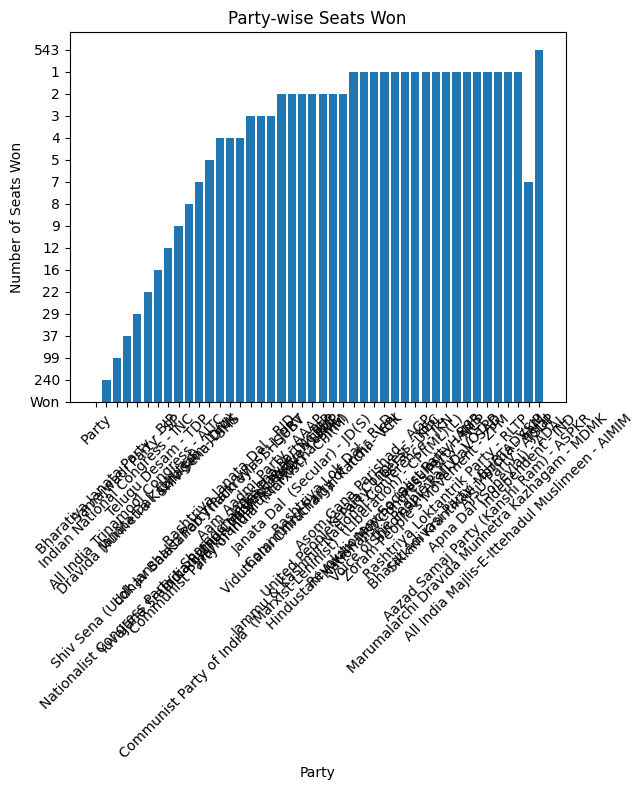

In [89]:
# prompt: generate a good chart for partywin.csv

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("partywin.csv")

# Create a bar chart
plt.bar(df["Party"], df["Won"])

# Add labels and title
plt.xlabel("Party")
plt.ylabel("Number of Seats Won")
plt.title("Party-wise Seats Won")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [90]:
# prompt: create a intractive chart for partywin.csv

import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import iplot
from plotly import graph_objs as go

# Read the CSV file
df = pd.read_csv("partywin.csv")

# Create a bar chart
data = [
    go.Bar(
        x=df["Party"],
        y=df["Won"],
        marker=dict(color="pink"),
    )
]

# Create a layout
layout = go.Layout(
    title="Party-wise Seats Won",
    xaxis=dict(title="Party"),
    yaxis=dict(title="Number of Seats Won"),
)

# Create a figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)


In [92]:
# prompt: create a intractive pie chart for partywin.csv exclude total

import pandas as pd
from plotly.offline import iplot
from plotly import graph_objs as go

# Read the CSV file
df = pd.read_csv("partywin.csv")

# Filter out the "Total" row
df = df[df["Party"] != "Total"]

# Create a pie chart
data = [
    go.Pie(
        labels=df["Party"],
        values=df["Won"],
        hole=0.4,
    )
]

# Create a layout
layout = go.Layout(
    title="Party-wise Seats Won (excluding Total)",
)

# Create a figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)


In [93]:
# prompt: create a intractive chart for partywin.csv exclude total and show top 10

# Read the CSV file
df = pd.read_csv("partywin.csv")

# Filter out the "Total" row
df = df[df["Party"] != "Total"]

# Sort by "Won" in descending order and select top 10
df = df.sort_values(by="Won", ascending=False).head(10)

# Create a bar chart
data = [
    go.Bar(
        x=df["Party"],
        y=df["Won"],
        marker=dict(color="pink"),
    )
]

# Create a layout
layout = go.Layout(
    title="Top 10 Parties - Seats Won",
    xaxis=dict(title="Party"),
    yaxis=dict(title="Number of Seats Won"),
)

# Create a figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)
